# **Análise da realimentação de estados**
Para um sistema
$$
\begin{align*}
    \mathbf{\dot{x}} &= \mathbf{Ax+B}u
\end{align*}
$$
se usarmos a lei de controle $u = -\mathbf{Kx}$, a equação deixará de ter entrada, podendo ser resolvida a partir da condição inicial.

$$
\begin{align*}
    \mathbf{\dot{x}} &= \mathbf{Ax+B(-Kx)}\\
    &= \mathbf{Ax-BKx}\\
    &= \mathbf{(A-BK)x}\\
    \mathbf{\dot{x}} &= \mathbf{A}_m \mathbf{x}
\end{align*}
$$


Vamos chamar a matriz $\mathbf{A}_m$ de "matriz de malha fechada". 

A última equação é uma EDO que não possui entrada, então só tem sentido resolvê-la para uma condição inicial $\mathbf{x}(0)$ diferente de zero.

A condição necessária para que os estados do sistema caminhem para zero em regime permanente é apenas que o sistema em malha fechada seja estável, isto é, **todos** os autovalores da matriz $\mathbf{A}_m$ devem ter parte real estritamente negativa. 

A velocidade com que os estados convergem para zero depende dos autovalores de $\mathbf{A}_m$. Isso é equivalente a satisfazer as condições de overshoot, tempo de acomodação e dominância.

Vamos supor que essas condições de projeto estejam definidas em termos de pólos de malha fechada bem selecionados e que esses pólos determinam um polinômio de malha fechada $\alpha (s)$.


Sendo assim, o problema de regulação é enunciado como: *achar a matriz $\mathbf{K}$,  tal que todas as raizes da equação:*
$$
\begin{align}
    \det (s\mathbf{I-A_m})= \det (s\mathbf{I-A+BK})=\alpha (s)
\end{align}
$$
estejam no semi-plano esquerdo

## **Exemplo**

<p align="center">
<img src="Ex7.15.svg" width="90%">
</p>

Como os parâmetros do problema não são numéricos, precisamos resolver usando matemática simbólica.

In [1]:
# Imports
import numpy as np
import sympy as sp
from IPython.display import display, Math
from escrever import *
esc = escrever()

In [4]:
# Define os símbolos
w0 = sp.symbols('\omega_0',real=True)
s = sp.symbols('s')
k1,k2 = sp.symbols(['k_1','k_2'],real=True)

In [7]:
# Define as matrizes do sistema
A = sp.Matrix([[0,1],[-w0**2,0]])
B = sp.Matrix([[0],[1]])
display(Math(r'\mathbf{A} = ' + sp.latex(A)))
display(Math(r'\mathbf{B} = ' + sp.latex(B)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
# Define o vetor de ganhos
K = sp.Matrix([k1,k2]).T      # Transpor para virar vetor linha
display(Math(r'\mathbf{K} = ' + sp.latex(K)))

<IPython.core.display.Math object>

In [10]:
# Faz os cálculos
Am = A-B@K

display(Math(r's\mathbf{I-A+BK = }'))
eq1 = '= s' + sp.latex(sp.eye(2))  # sI
eq1 += '-' + sp.latex(A) + '+' + sp.latex(B) + sp.latex(K) +'='
eq2 = '= ' + sp.latex(s*sp.eye(2)) + '-'  + sp.latex(A) + '+' + sp.latex(B@K) + ' = '
eq3 = '= ' + sp.latex(s*sp.eye(2)-Am)
display(Math(eq1))
display(Math(eq2))
display(Math(eq3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
# Polinômio de MF
p=sp.det(s*sp.eye(2)-Am)
display(Math(r'|s\mathbf{I}-\mathbf{A+BK}|=' + sp.latex(p) ))

<IPython.core.display.Math object>

In [12]:
# Polinômio desejado
alpha = (s+2*w0)**2
display(Math(r'\alpha(s) = ' + sp.latex(alpha) + ' = ' + sp.latex(sp.expand(alpha))))
alpha= sp.expand(alpha)


<IPython.core.display.Math object>

In [13]:
# Igualando os termos em de potência abaixo de 2
equacoes=[ sp.Eq(alpha.coeff(s,n),p.coeff(s,n)) for n in (0,1)
           ]
display(Math(sp.latex(equacoes[0])))
display(Math(sp.latex(equacoes[1])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
# Solução
sol=sp.solve(equacoes,[k1,k2])
eq1 = sp.Eq(k1,sol[k1])
eq2 = sp.Eq(k2,sol[k2])
display(Math(sp.latex(eq1)))
display(Math(sp.latex(eq2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

O livro mostra uma simulação da resposta desse sistema para $\omega_0=1$. Repare que os gráficos mostram, em função do tempo, os dois estados. 

<p align="center">
<img src="Fig7.13.svg" width="100%">
</p>

Note que nenhum dos gráficos oscila. Isso porque as características dos pólos que foram alocados são válidas para todos os estados e a saída do sistema.

In [2]:
import control as ct
import numpy as np

w0 = 1.
A = np.array([[0,1],[-w0**2,0]])
B = np.array([[0],[1]])
C = np.array([[1,0],[0,1]])
D = np.array([[0],[0]])
K = np.array([[3*w0**2,4*w0]])
Am = A-B@K
Bm = np.zeros((2,1))

mf = ct.ss(Am,Bm,C,D)
print(mf)

<LinearIOSystem>: sys[3]
Inputs (1): ['u[0]']
Outputs (2): ['y[0]', 'y[1]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.  1.]
     [-4. -4.]]

B = [[0.]
     [0.]]

C = [[1. 0.]
     [0. 1.]]

D = [[0.]
     [0.]]



In [16]:
T= ct.damp(mf)

_____Eigenvalue______ Damping___ Frequency_
        -2                     1          2
        -2                     1          2


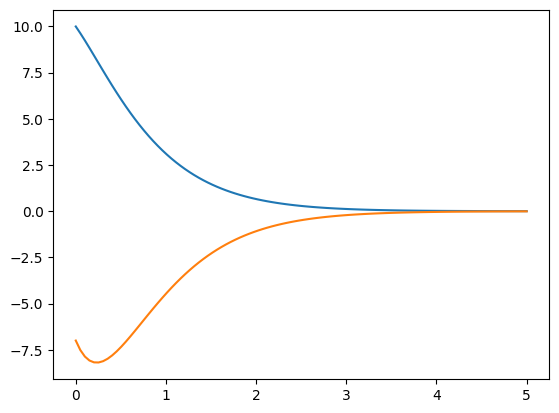

In [14]:
from matplotlib import pyplot as plt
t,y = ct.initial_response(mf,5,[10,-7])
plt.plot(t,y[0],t,y[1])

## Exercício

Ache a forma de controlador do sistema
$$
\begin{align}
    G(s) = \frac{20}{(s+1)(s+2)}
\end{align}
$$

Depois, projete um controlador de realimentação de estados que posicione os pólos em $-3\pm j5$. Faça uma simulação para estados iniciais arbitrários.